## 1. Importing Dependencies

In [10]:
import os
import gym 

#Algorithms
from stable_baselines3 import PPO 

#Vecotrized Environment (Multiple Environment)
from stable_baselines3.common.vec_env import DummyVecEnv #Vectorizing not used

#How the model is performing after certain number of episodes.
from stable_baselines3.common.evaluation import evaluate_policy

### Simulation vs Real World Environment 
Real world training of robot will cause wear and tear of the robot 
Training and Testing can be done in Simulation Env and application can be done in real world.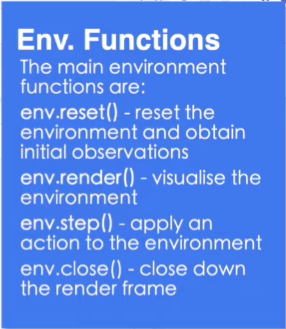

## 2. Loading the Environment

In [11]:
environment_name = 'CartPole-v0'
env = gym.make(environment_name)

episodes = 5
for episode in range(1, episodes+1): # looping through 5 episodes
    state = env.reset() #get the environment to the initial state
    done = False        #temp variables
    score = 0           #temp variables (Score counter for every episode.)
    
    while not done:
        env.render()    
        action = env.action_space.sample()  # Later to be replaced with the Trained Model
        debug_text = ''
        n_state, reward, done, info = env.step(action)
        debug_text = str((n_state, reward, done, info))
        print(debug_text)
        
        score+=reward
    print('\n------------> Episode:{} Score:{}\n\n\n'.format(episode, score))
env.close()

(array([-0.01640109,  0.16350435, -0.04649386, -0.31788521]), 1.0, False, {})
(array([-0.013131  , -0.03092563, -0.05285156, -0.04021969]), 1.0, False, {})
(array([-0.01374952,  0.16491281, -0.05365596, -0.34909829]), 1.0, False, {})
(array([-0.01045126, -0.02940659, -0.06063792, -0.07380594]), 1.0, False, {})
(array([-0.01103939,  0.16652989, -0.06211404, -0.38498712]), 1.0, False, {})
(array([-0.00770879,  0.36247614, -0.06981378, -0.69658947]), 1.0, False, {})
(array([-0.00045927,  0.16838825, -0.08374557, -0.42667542]), 1.0, False, {})
(array([ 0.00290849, -0.02545389, -0.09227908, -0.16152365]), 1.0, False, {})
(array([ 0.00239942,  0.17085966, -0.09550955, -0.48183266]), 1.0, False, {})
(array([ 0.00581661,  0.3671908 , -0.10514621, -0.80302431]), 1.0, False, {})
(array([ 0.01316043,  0.56358529, -0.12120669, -1.12684514]), 1.0, False, {})
(array([ 0.02443213,  0.37024168, -0.1437436 , -0.87450502]), 1.0, False, {})
(array([ 0.03183696,  0.17733571, -0.1612337 , -0.63024555]), 1.

In [12]:
str((n_state, reward, done, info))

'(array([-0.13694303, -0.58100085,  0.22282467,  1.24183363]), 1.0, True, {})'

In [13]:
env.close()

## 3. Understanding the Environment

In [14]:
""""
Description:
        A pole is attached by an un-actuated joint to a cart, which moves along
        a frictionless track. The pendulum starts upright, and the goal is to
        prevent it from falling over by increasing and reducing the cart's
        velocity.
    Source:
        This environment corresponds to the version of the cart-pole problem
        described by Barto, Sutton, and Anderson
    Observation:
        Type: Box(4)
        Num     Observation               Min                     Max
        0       Cart Position             -4.8                    4.8
        1       Cart Velocity             -Inf                    Inf
        2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
        3       Pole Angular Velocity     -Inf                    Inf
    Actions:
        Type: Discrete(2)
        Num   Action
        0     Push cart to the left
        1     Push cart to the right
        Note: The amount the velocity that is reduced or increased is not
        fixed; it depends on the angle the pole is pointing. This is because
        the center of gravity of the pole increases the amount of energy needed
        to move the cart underneath it
    Reward:
        Reward is 1 for every step taken, including the termination step
    Starting State:
        All observations are assigned a uniform random value in [-0.05..0.05]
    Episode Termination:
        Pole Angle is more than 12 degrees.
        Cart Position is more than 2.4 (center of the cart reaches the edge of
        the display).
        Episode length is greater than 200.
        Solved Requirements:
        Considered solved when the average return is greater than or equal to
        195.0 over 100 consecutive trials.
    """

#to reset the env 
print("# Reset Env : ")
print(env.reset())

#to check all the possibloe actions we can take
print("\n# Action Space")
print(env.action_space)          # Discrete(2) for cartpole we have Left and Right (2 Actions in action space)

print("\n# Action Space - Sample : ")
print(env.action_space.sample()) # Gives out random samples from the Action Space

#to check the observation space
print("\n# Observation Space : box(min , max , size , DType)")
print(env.observation_space)

#to run steps in the environment - we pass action space as an argument
print("\n# Step Environment : n_state, reward+1,0,-1 , done, info")
print(env.step(1))


# Reset Env : 
[-0.04465558 -0.03437141 -0.02342469 -0.04597767]

# Action Space
Discrete(2)

# Action Space - Sample : 
1

# Observation Space : box(min , max , size , DType)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

# Step Environment : n_state, reward+1,0,-1 , done, info
(array([-0.04534301,  0.16107847, -0.02434424, -0.34595829]), 1.0, False, {})


https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html

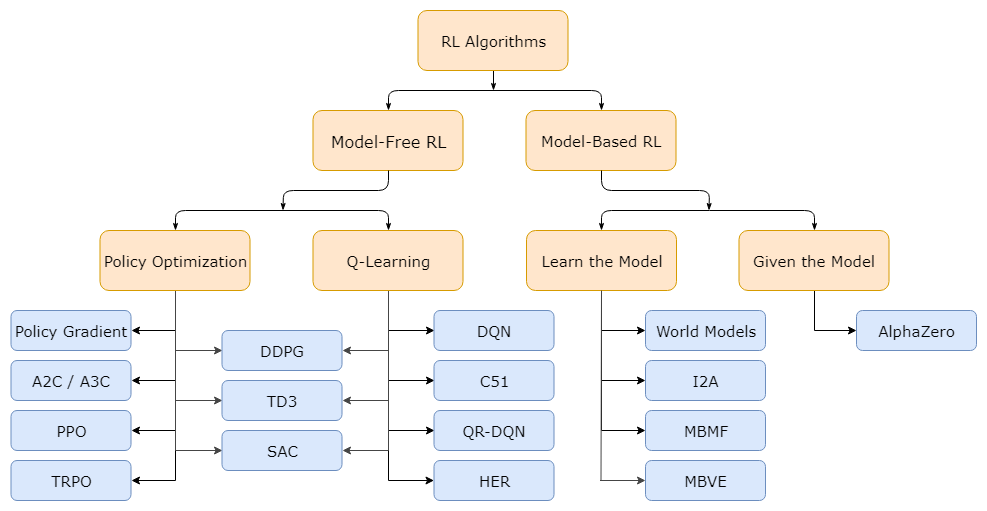



https://stable-baselines3.readthedocs.io/en/master/guide/algos.html

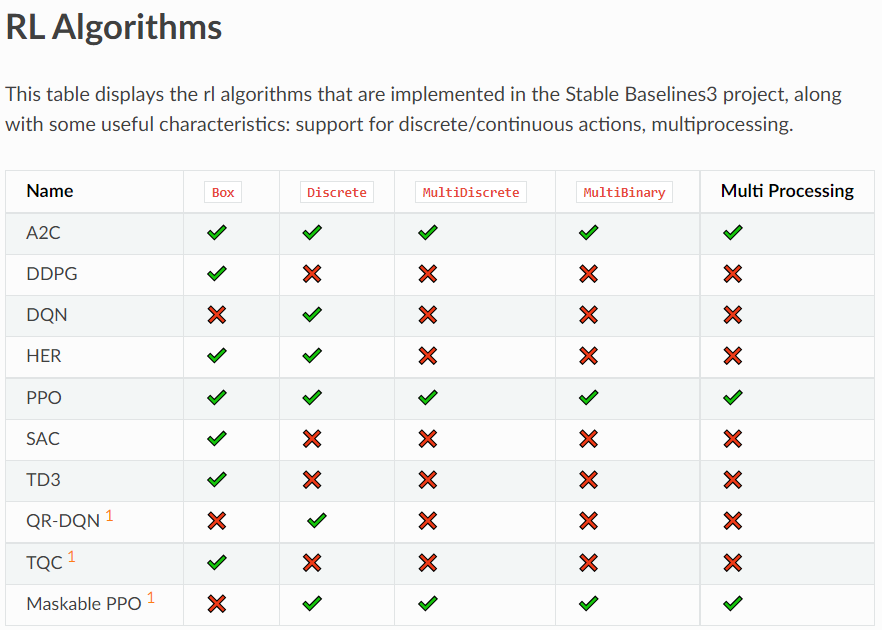

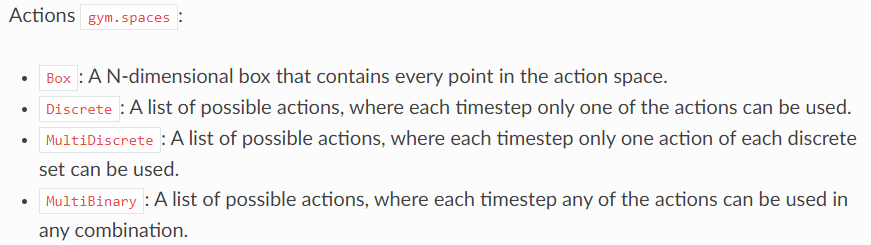

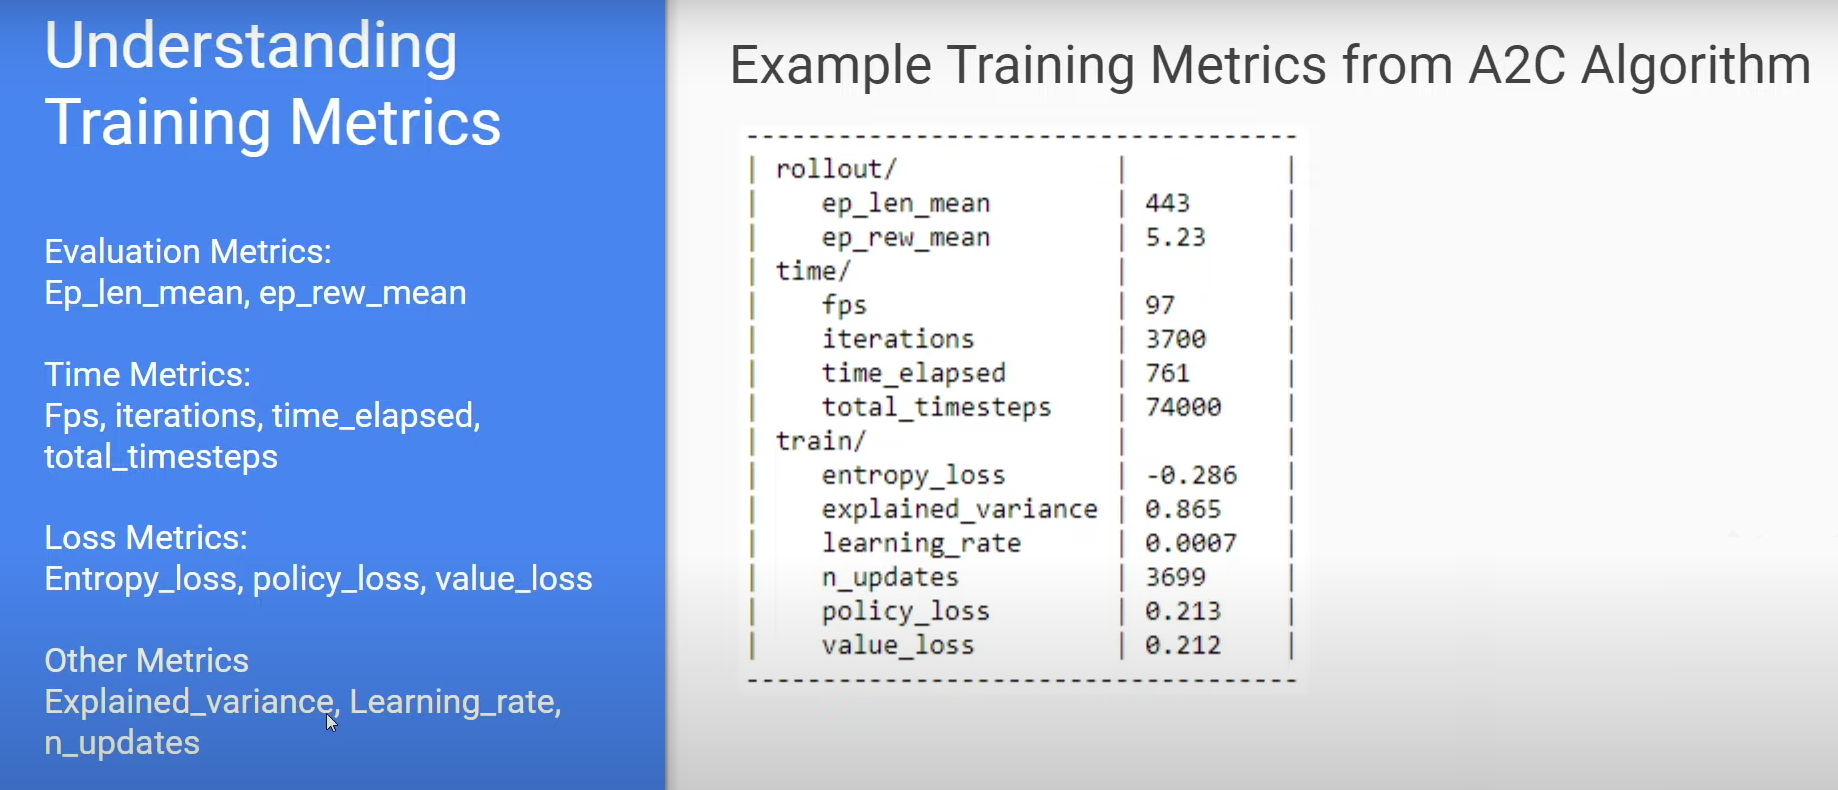

https://youtu.be/Mut_u40Sqz4?t=2862
  

## 4. Training Model
Creating a directory to save the logs(tensor board) and the models

└───Training     
&emsp;&emsp;&emsp;├───Logs    
&emsp;&emsp;&emsp;└───Saved Models   
    
We will be using the PPO as the Algorithm for the Cart-pole

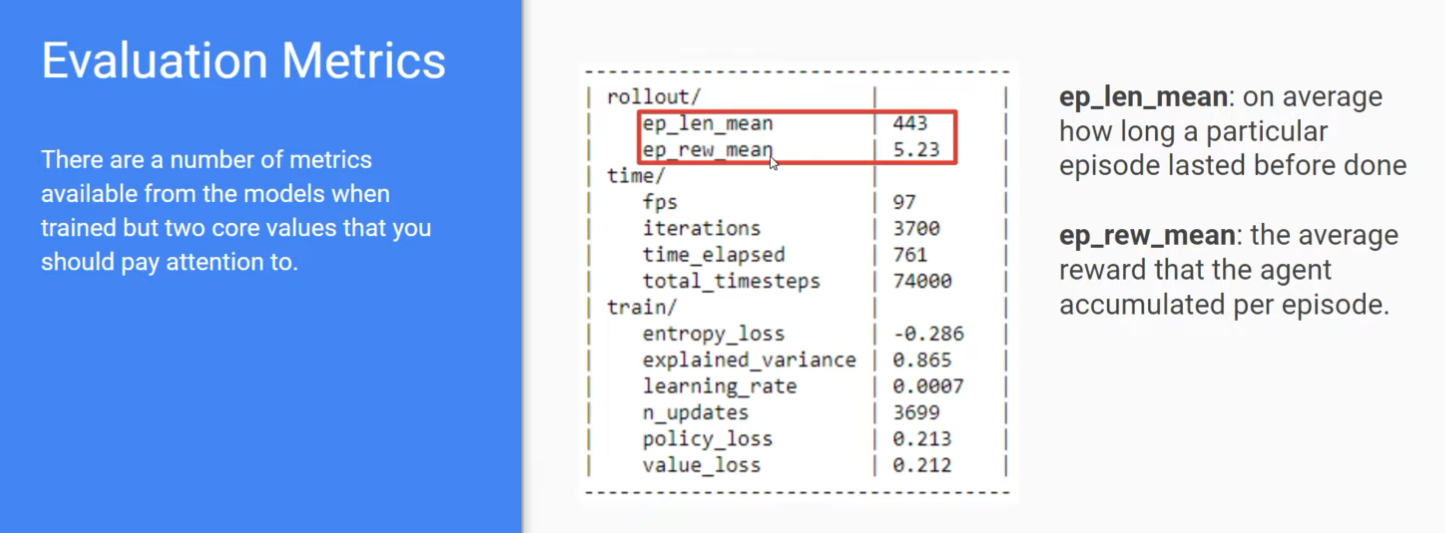

In [15]:
# Make your own directories first
log_path = os.path.join('Training' , 'Logs')
print(log_path)

Training\Logs


In [16]:
environment_name = 'CartPole-v0'
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy',env , verbose=1, tensorboard_log=log_path)
model.learn(total_timesteps=40000)

Using cuda device
Logging to Training\Logs\PPO_7
-----------------------------
| time/              |      |
|    fps             | 234  |
|    iterations      | 1    |
|    time_elapsed    | 8    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 284         |
|    iterations           | 2           |
|    time_elapsed         | 14          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008770548 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.000619   |
|    learning_rate        | 0.0003      |
|    loss                 | 8.71        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 56.2        |
---------------------------

-----------------------------------------
| time/                   |             |
|    fps                  | 400         |
|    iterations           | 13          |
|    time_elapsed         | 66          |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.004935453 |
|    clip_fraction        | 0.0223      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.57       |
|    explained_variance   | 0.709       |
|    learning_rate        | 0.0003      |
|    loss                 | 16.9        |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.00179    |
|    value_loss           | 77.1        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 403          |
|    iterations           | 14           |
|    time_elapsed         | 71           |
|    total_timesteps      | 2

In [17]:
# Help for the PPO Policy
#PPO??

## 5. Saving Model
Creating a directory to save the trained models.

In [18]:
PPO_path = os.path.join('Training' , 'Saved Models' , 'PPO Model Cartpole')
model.save(PPO_path)

In [19]:
#Deleting and Reloading the Model from File
del model
model = PPO.load(PPO_path , env)

## 6. Evaluating Model
How the model is performing after certain number of episodes.      
<code>from stable_baselines3.common.evaluation import evaluate_policy</code>

There are some environment for them the best Score is capped For E.g. in Cartpole-v1 [Max Score is Capped 200]   
So, If the Score of **200** is achieved the Env is considered Solved

In [20]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)
#evaluate_policy??

C:\Users\astik\.conda\envs\RL3\lib\site-packages\stable_baselines3\common\evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


(200.0, 0.0)

In [21]:
# Closing the Environment after the Evaluation
env.close()

## 7. Testing Model

In [22]:
obs = env.reset()  # Model gets the Obs as Environment Observation
model.predict(obs) # Gives out the Output Action(0/1-Push cart to the left/right) and State(None)

(array([0], dtype=int64), None)

In [23]:
episodes = 5
for episode in range(1, episodes+1): # looping through 5 episodes
    obs = env.reset() #get the environment to the initial state
    done = False        #temp variables
    score = 0           #temp variables (Score counter for every episode.)
    
    while not done:
        env.render()    
        action , _ = model.predict(obs)  # Now to be replaced with the Trained Model
        debug_text = ''
        obs, reward, done, info = env.step(action)
        debug_text = str((obs, reward, done, info))
        #print(debug_text)
        
        score+=reward
    print('\n------------> Episode:{} Score:{}'.format(episode, score))
env.close()


------------> Episode:1 Score:[200.]

------------> Episode:2 Score:[200.]

------------> Episode:3 Score:[200.]

------------> Episode:4 Score:[200.]

------------> Episode:5 Score:[200.]


## 8. Viewing logs in Tensorboard

In [24]:
import os
os.getcwd()
log_path = os.path.join('Training' , 'Logs')
print(log_path)
training_log_path = os.path.join(os.getcwd() , log_path , 'PPO_4')
print(training_log_path)

Training\Logs
D:\Coursera_Udacity\03_Reinforcement_Learning\02_Main_Course\Training\Logs\PPO_4


In [25]:
# Run this in the CMD 
#!tensorboard --logdir={training_log_path}


# NOTE
## Core Metrics to look at :    
1. Average Reward
2. Average Episode Length

## Training Strategies : 
1. Train For Longer
2. Hyper-Parameter Tuning
3. Try Different Algorithm


## 9. Adding callbacks to Training Stage

In [26]:
#Adding Evaluation Callbacks for Early Stopping and Saving Model
from stable_baselines3.common.callbacks import EvalCallback , StopTrainingOnRewardThreshold
import os
save_path = os.path.join(os.getcwd(),'Training' , 'Saved Models')
save_path

'D:\\Coursera_Udacity\\03_Reinforcement_Learning\\02_Main_Course\\Training\\Saved Models'

In [27]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=2b00,verbose=1)
eval_callback = EvalCallback(env,
                             callback_on_new_best = stop_callback,
                             eval_freq = 10000,
                             best_model_save_path = save_path,
                             verbose = 1 )

In [30]:
model = PPO('MlpPolicy',env , verbose=1, tensorboard_log=log_path)
model.learn(total_timesteps=40000 , callback=eval_callback)

Using cuda device


## 10. Changing Policies

    
https://stable-baselines3.readthedocs.io/en/master/guide/custom_policy.html#on-policy-algorithms    
    
**net_arch :** is shared between the Custom actor (pi) and value function (vf)
For E.g. :    
Value network deeper than policy network, first layer shared:<code> net_arch=[128, dict(vf=[256, 256])]</code>

          obs
           |
         <128>
&emsp;&emsp;&emsp;/ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; \\    
action&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<256>    
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|    
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<256>    
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|    
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;value

In [ ]:
net_arch = [128,128]
model = PPO('MlpPolicy',env , verbose=1, tensorboard_log=log_path , policy_kwargs={'net_arch' :net_arch})
model.learn(total_timesteps=10000 , callback=eval_callback)


## 11. Using an Alternate Algorithm
here, DQN 

In [46]:
import os
import gym 

#Algorithms
from stable_baselines3 import DQN

In [48]:
model = DQN('MlpPolicy',env , verbose=1, tensorboard_log=log_path)
model.learn(total_timesteps=20000 , callback=eval_callback)


Using cuda device
Logging to Training\Logs\DQN_2
----------------------------------
| rollout/            |          |
|    exploration rate | 0.953    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 6993     |
|    time_elapsed     | 0        |
|    total timesteps  | 98       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.913    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 7996     |
|    time_elapsed     | 0        |
|    total timesteps  | 184      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.868    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 8422     |
|    time_elapsed     | 0        |
|    total timesteps  | 278      |
----------------------------------
------

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 8239     |
|    time_elapsed     | 0        |
|    total timesteps  | 2480     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 8257     |
|    time_elapsed     | 0        |
|    total timesteps  | 2593     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 8253     |
|    time_elapsed     | 0        |
|    total timesteps  | 2674     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 8140     |
|    time_elapsed     | 0        |
|    total timesteps  | 4876     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 8115     |
|    time_elapsed     | 0        |
|    total timesteps  | 4942     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 8099     |
|    time_elapsed     | 0        |
|    total timesteps  | 4997     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 8152     |
|    time_elapsed     | 0        |
|    total timesteps  | 7255     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 8148     |
|    time_elapsed     | 0        |
|    total timesteps  | 7357     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 8126     |
|    time_elapsed     | 0        |
|    total timesteps  | 7419     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 424      |
|    fps              | 7735     |
|    time_elapsed     | 1        |
|    total timesteps  | 9439     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 428      |
|    fps              | 7724     |
|    time_elapsed     | 1        |
|    total timesteps  | 9557     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 7729     |
|    time_elapsed     | 1        |
|    total timesteps  | 9664     |
----------------------------------


C:\Users\astik\.conda\envs\RL3\lib\site-packages\stable_baselines3\common\evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 7731     |
|    time_elapsed     | 1        |
|    total timesteps  | 9743     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 7738     |
|    time_elapsed     | 1        |
|    total timesteps  | 9860     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 444      |
|    fps              | 7730     |
|    time_elapsed     | 1        |
|    total timesteps  | 9912     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 544      |
|    fps              | 7778     |
|    time_elapsed     | 1        |
|    total timesteps  | 12238    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 548      |
|    fps              | 7761     |
|    time_elapsed     | 1        |
|    total timesteps  | 12297    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 552      |
|    fps              | 7772     |
|    time_elapsed     | 1        |
|    total timesteps  | 12446    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 652      |
|    fps              | 7793     |
|    time_elapsed     | 1        |
|    total timesteps  | 14600    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 656      |
|    fps              | 7797     |
|    time_elapsed     | 1        |
|    total timesteps  | 14694    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 660      |
|    fps              | 7808     |
|    time_elapsed     | 1        |
|    total timesteps  | 14846    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 760      |
|    fps              | 7789     |
|    time_elapsed     | 2        |
|    total timesteps  | 16971    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 764      |
|    fps              | 7788     |
|    time_elapsed     | 2        |
|    total timesteps  | 17041    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 768      |
|    fps              | 7792     |
|    time_elapsed     | 2        |
|    total timesteps  | 17151    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 860      |
|    fps              | 7593     |
|    time_elapsed     | 2        |
|    total timesteps  | 19287    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 864      |
|    fps              | 7598     |
|    time_elapsed     | 2        |
|    total timesteps  | 19401    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 868      |
|    fps              | 7599     |
|    time_elapsed     | 2        |
|    total timesteps  | 19471    |
----------------------------------
----------------------------------
| rollout/          